In [1]:
!pip install imblearn
!pip install ultimate==2.1.2
!pip install scikit-learn-intelex

In [2]:
import pickle
import imblearn
print(imblearn.__version__)
from itertools import *
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from __future__ import print_function
from ultimate.mlp import MLP
import numpy as np
import sys, random
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

0.9.0


In [3]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Data Reading

In [4]:
#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))


#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))
#df = pd.read_csv('MachineLearningCSV.csv')
df = pd.read_csv('df.csv')

In [5]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [6]:
df.columns = col_names

In [7]:
df = df.sample(n=100000)

In [8]:
#df = df.sample(n=800000).reset_index(drop=True)

In [9]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [10]:
#df.drop('Unnamed: 0', axis = 1)

In [11]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
989100,53,218,2,2,100,356,50,50,50.000000,0.000000,...,20,0.00000,0.000000,0,0,0.000,0.000000,0,0,BENIGN
1730873,80,110422405,12,12,72,0,6,6,6.000000,0.000000,...,20,35197.18182,105.008398,35356,35069,9999997.455,347.041025,10000000,9999417,BENIGN
601872,443,3278802,6,7,559,3157,342,0,93.166667,144.632523,...,20,0.00000,0.000000,0,0,0.000,0.000000,0,0,BENIGN
1810645,80,13489,2,2,12,11,6,6,6.000000,0.000000,...,20,0.00000,0.000000,0,0,0.000,0.000000,0,0,DoS Hulk
1614431,40702,10031,2,1,37,0,37,0,18.500000,26.162951,...,20,0.00000,0.000000,0,0,0.000,0.000000,0,0,BENIGN


In [12]:
def RForest_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_test_predict = clf.predict(X_test.values.reshape(-1,1))
    clf.score(X_test.values.reshape(-1,1),y_test)
    print(classification_report(y_test,y_test_predict))

# Data Cleaning

In [13]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [14]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [15]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [16]:
df_FwdHeaderLength = df["Fwd_Header_Length"].iloc[:,0]
df.drop("Fwd_Header_Length",axis=1,inplace=True)
df["Fwd_Header_Length"]=df_FwdHeaderLength.values

In [17]:
df.duplicated(subset=None, keep='first')

989100     False
1730873    False
601872     False
1810645    False
1614431    False
           ...  
1709022    False
784816      True
396271     False
313906     False
1847767    False
Length: 100000, dtype: bool

In [18]:
df.duplicated().sum()/len(df)

0.03536

In [19]:
# making a bool series
bool_series = df.duplicated()
 
# displaying data
df.head()
 
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,Fwd_Header_Length
465787,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
2045613,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
1055480,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
436272,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
1405884,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582411,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
2177099,443,49,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
1511745,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
1689674,15660,43,1,1,0,6,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,PortScan,1,40


In [20]:
df.shape

(100000, 79)

In [21]:
df = df[~bool_series].reset_index(drop=True)

In [22]:
df.shape

(96464, 79)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96464 entries, 0 to 96463
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             96464 non-null  int64  
 1   Flow_Duration                96464 non-null  int64  
 2   Total_Fwd_Packets            96464 non-null  int64  
 3   Total_Backward_Packets       96464 non-null  int64  
 4   Total_Length_of_Fwd_Packets  96464 non-null  int64  
 5   Total_Length_of_Bwd_Packets  96464 non-null  int64  
 6   Fwd_Packet_Length_Max        96464 non-null  int64  
 7   Fwd_Packet_Length_Min        96464 non-null  int64  
 8   Fwd_Packet_Length_Mean       96464 non-null  float64
 9   Fwd_Packet_Length_Std        96464 non-null  float64
 10  Bwd_Packet_Length_Max        96464 non-null  int64  
 11  Bwd_Packet_Length_Min        96464 non-null  int64  
 12  Bwd_Packet_Length_Mean       96464 non-null  float64
 13  Bwd_Packet_Lengt

In [24]:
#df = df[(df.Label != 'SQL')&(df.Label != 'Infiltration')&(df.Label != 'Heartbleed')].reset_index(drop=True)

In [25]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [26]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 12696 percentage 13.161386631282138 % 
[   53    80   443 40702 57712] ...
======================= Flow_Duration =======================
Unique values 54139 percentage 56.12352794825013 % 
[      218 110422405   3278802     13489     10031] ...
======================= Total_Fwd_Packets =======================
Unique values 299 percentage 0.3099601924033836 % 
[    2    12     6     1     3    23    17     4    50    11    10     8
     9     7    20     5   207    26    19    13    46    18    16    39
    25    21    30    14    31    15    24   152    38    29    82    43
    27    86    83    22    35    88    51    45    49    34    59   111
    56    76    28    33   518    37    44    42   101    62    41    65
   155    78    32   248    85   353   144   133    36    69    47    61
    64   312    97   191   263   470   104    48   425   307    70   195
    57    96   105   176    77   139   237   106

======================= Max_Packet_Length =======================
Unique values 2776 percentage 2.877757505390612 % 
[ 178    6 1460   11   37] ...
======================= Packet_Length_Mean =======================
Unique values 17190 percentage 17.820119422789848 % 
[101.2          3.12       265.42857143   5.8         18.5       ] ...
======================= Packet_Length_Std =======================
Unique values 23417 percentage 24.275377342842926 % 
[ 70.10848736   3.05941171 453.87082444   3.89871774  21.36195996] ...
======================= Packet_Length_Variance =======================
Unique values 22946 percentage 23.787112290595456 % 
[4.91520000e+03 9.36000000e+00 2.05998725e+05 1.52000000e+01
 4.56333333e+02] ...
======================= FIN_Flag_Count =======================
Unique values 2 percentage 0.0020733123237684525 % 
[0 1]
Count_by_unique: 
0    93484
1     2980
Name: FIN_Flag_Count, dtype: int64
======================= SYN_Flag_Count =======================
Unique

BENIGN              78847
DoS Hulk             6401
PortScan             5350
DDoS                 4527
DoS GoldenEye         392
FTP-Patator           230
DoS slowloris         223
DoS Slowhttptest      181
SSH-Patator           165
Bot                    75
Brute Force            41
XSS                    29
Infiltration            2
SQL                     1
Name: Label, dtype: int64
BENIGN 78847 81.73722839608558
DoS Hulk 6401 6.635636092220933
PortScan 5350 5.54611046608061
DDoS 4527 4.692942444849892
DoS GoldenEye 392 0.40636921545861665
FTP-Patator 230 0.23843091723337204
DoS slowloris 223 0.23117432410018246
DoS Slowhttptest 181 0.18763476530104495
SSH-Patator 165 0.17104826671089732
Bot 75 0.07774921214131696
Brute Force 41 0.04250290263725327
XSS 29 0.030063028694642564
Infiltration 2 0.0020733123237684525
unique labels to drop Infiltration
SQL 1 0.0010366561618842262
unique labels to drop SQL
======================= Attack =======================
Unique values 2 percentage 0

In [27]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['Infiltration', 'SQL']


In [28]:
df.shape

(96464, 79)

In [29]:
df.drop(drop_col, axis=1, inplace=True)

In [30]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [31]:
df.shape

(96461, 71)

# Preprocessing

In [32]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, test_index in sss.split(X, y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]
    y_train_aux = y_train.copy()
    y_test_aux = y_test.copy()
    y_train_aux['count_'] = 1
    y_test_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_test_aux.groupby(0).count()
    print(y_train, y_test)
    print(X_train.head())
    MMS = MinMaxScaler()
    x_train_scaled = MMS.fit_transform(X_train)
    x_test_scaled = MMS.transform(X_test)
    X = MMS.fit_transform(X)
    X_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)
    print(X_train.shape)
    print(X_test.shape)
    print(x_test_scaled.shape)
    return X_train_scaled, X_test_scaled, y_train, y_test, X, y

In [33]:
x_train_preprocess_model, x_test_preprocess_model, y_train, y_test, X, y = preprocessing_model(df)

[0 0 0 ... 0 0 5]
['Bwd_PSH_Flags', 'Bwd_URG_Flags', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['Infiltration', 'SQL']
Counter({0: 1})
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [100902 612168 834435 ... 724011 320276 237086] TEST: [783334   7258 344844 ... 381684  14628 370575]
TRAIN: [103827 782821 116460 ... 349452 796952 315359] TEST: [ 45486 278843  97884 ... 452366 359896  17458]
TRAIN: [ 75384 599774 834338 ... 275921 135161 552514] TEST: [184106 333696 602033 ... 732499  92331 717946]
TRAIN: [ 25109 229063  52962 ...  98196 252311 914676] TEST: [188687 531428 725128 ... 475058 457048 198390]
TRAIN: [ 61940 365696 692006 ... 348379 159579  48543] TEST: [635454 621852 798863 ... 144093 335390  16897]
        0
61940   0
365696  4
692006  8
671343  8
625937  7
...    ..
405232  4
363257  4
348379  4
159579  1
48543   9

[804239 row

In [34]:
x_train_preprocess_model.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Fwd_Header_Length
0,0.000809,0.000001,0.000128,0.000278,0.000121,0.000006,0.001541,0.018154,0.008940,0.000000,...,1.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.999808
1,0.001221,0.056188,0.001026,0.000556,0.000722,0.000698,0.018408,0.000000,0.011655,0.024451,...,1.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.999808
2,0.000320,0.073805,0.001026,0.002084,0.000190,0.000011,0.001113,0.000000,0.003119,0.001792,...,1.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.999808
3,0.000320,0.076596,0.001026,0.002084,0.000165,0.000011,0.000899,0.000000,0.002712,0.001478,...,1.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.999808
4,0.001221,0.833331,0.000128,0.000278,0.000027,0.000000,0.000342,0.004034,0.001987,0.000000,...,1.0,7.819519e-07,0.0,7.209994e-07,7.690033e-07,0.833333,0.0,0.833333,0.833333,0.999808


In [35]:
x_train_preprocess_model.isnull().sum().sum()

0

# Set_Model 

In [36]:
rfe_column_selection = 20

In [37]:
param_rfe = {
    'loss_type': 'mse',
    'layer_size': [rfe_column_selection,16,16,16,1],
    'activation': 'am2',
    'output_range': [0, 1],
    'output_shrink': 0.001,
    'importance_mul': 0.0001,
    'importance_out': True,
    'rate_init': 0.02, 
    'rate_decay': 0.9, 
    'epoch_train': 10, 
    'epoch_decay': 1,
    'verbose': 0,
}

In [38]:
# create pipeline
rfe = RFE(estimator = MLP(param_rfe), n_features_to_select=20)
model = MLPClassifier()
model_ = MLP(param_rfe)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [39]:
pipeline.fit(x_train_preprocess_model, y_train)

ultimate 2.1.2
mesh init 0
mesh init 1
mesh init 2
mesh init 3
mesh init 4
mesh init 5
mesh init 6
mesh init 7
mesh init 8
mesh init 9
mesh init 10
mesh init 11
mesh init 12
mesh init 13
mesh init 14
mesh init 15
mesh init 16
mesh init 17
mesh init 18
mesh init 19
mesh init 20
mesh init 21
mesh init 22
mesh init 23
mesh init 24
mesh init 25
mesh init 26
mesh init 27
mesh init 28
mesh init 29
mesh init 30
mesh init 31
mesh init 32
mesh init 33
mesh init 34
mesh init 35
mesh init 36
mesh init 37
mesh init 38
mesh init 39
mesh init 40
mesh init 41
mesh init 42
mesh init 43
mesh init 44
mesh init 45
mesh init 46
mesh init 47
mesh init 48
mesh init 49


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('s',
                 RFE(estimator=<ultimate.mlp.MLP object at 0x00000296831603D0>,
                     n_features_to_select=20)),
                ('m', MLPClassifier())])

In [40]:
y_train

,0
61940,0
365696,4
692006,8
671343,8
625937,7
...,...
405232,4
363257,4
348379,4
159579,1


In [41]:
model_.fit(x_train_preprocess_model, y_train)

mesh init 50


In [42]:
pipeline[:-1].get_feature_names_out(input_features=None)

array(['Destination_Port', 'Flow_Duration', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Flow_Packets_s', 'Flow_IAT_Max', 'Fwd_IAT_Total', 'Fwd_IAT_Max',
       'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Down_Up_Ratio',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'Fwd_Header_Length'], dtype=object)

In [43]:
selected_features = pipeline[:-1].get_feature_names_out(input_features=None)

In [44]:
print(selected_features)

['Destination_Port' 'Flow_Duration' 'Fwd_Packet_Length_Min'
 'Fwd_Packet_Length_Mean' 'Fwd_Packet_Length_Std' 'Flow_Packets_s'
 'Flow_IAT_Max' 'Fwd_IAT_Total' 'Fwd_IAT_Max' 'Fwd_Packets_s'
 'Bwd_Packets_s' 'Min_Packet_Length' 'Packet_Length_Mean'
 'Packet_Length_Std' 'Down_Up_Ratio' 'Average_Packet_Size'
 'Avg_Fwd_Segment_Size' 'Init_Win_bytes_forward' 'Init_Win_bytes_backward'
 'Fwd_Header_Length']


In [45]:
model.fit(x_train_preprocess_model[selected_features], y_train)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

# Serialization

In [46]:
file = open('rfe_mlp_model.pkl', 'wb')
pickle.dump(model, file)
file.close()

In [47]:
model = pickle.load(open('rfe_mlp_model.pkl','rb'))

In [48]:
model.score(x_test_preprocess_model[selected_features], y_test)

0.9455909811520169

In [49]:
x_test_preprocess_model = x_test_preprocess_model[selected_features]

# Evaluate_Model

In [50]:
y_pred_rfemlp=model.predict(x_test_preprocess_model)

In [51]:
y_pred_rfemlp=pd.DataFrame(y_pred_rfemlp)
y_pred_rfemlp=round(y_pred_rfemlp)

In [52]:
print(classification_report(y_test, y_pred_rfemlp))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     11827
           1       0.99      1.00      0.99     11827
           2       0.75      0.60      0.67     11827
           3       1.00      1.00      1.00     11827
           4       1.00      0.99      1.00     11827
           5       0.99      1.00      0.99     11827
           6       1.00      1.00      1.00     11827
           7       1.00      1.00      1.00     11827
           8       1.00      1.00      1.00     11828
           9       0.98      1.00      0.99     11827
          10       1.00      1.00      1.00     11827
          11       0.67      0.81      0.73     11827

    accuracy                           0.95    141925
   macro avg       0.95      0.95      0.95    141925
weighted avg       0.95      0.95      0.95    141925



In [53]:
print('Confusion Matrix RFE/MLP:')
con_rfe_mlp = confusion_matrix(y_test, y_pred_rfemlp)
print(con_rfe_mlp)

Confusion Matrix RFE/MLP:
[[11249   157    32    56    11    71     2     9     0   200    15    25]
 [    0 11827     0     0     0     0     0     0     0     0     0     0]
 [    0     0  7104     0     0     0     0     0     0     0    23  4700]
 [    0     0     0 11826     1     0     0     0     0     0     0     0]
 [    0     0     0     0 11753    74     0     0     0     0     0     0]
 [    2     0     0     3     8 11805     0     6     0     2     0     1]
 [    0     0     0     0     0     0 11827     0     0     0     0     0]
 [    0     0     0     0     0     0     8 11819     0     0     0     0]
 [    0     0     0     0     0     0     0     2 11826     0     0     0]
 [   10     0     0     0     0     1     0     4     0 11812     0     0]
 [    0     0     0     0     0     0     0     0     0     0 11827     0]
 [    0     0  2299     0     0     0     0     0     0     0     0  9528]]


Text(30.5, 0.5, 'True')

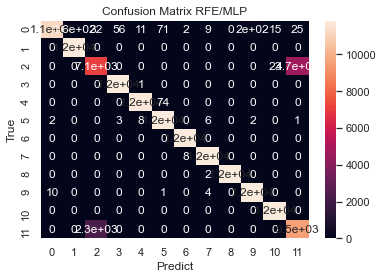

In [54]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(con_rfe_mlp,annot=True,ax=ax)

ax.set_title('Confusion Matrix RFE/MLP') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [55]:
y_pred_rfemlp_vectorized=model.predict_proba(x_test_preprocess_model)#.argmax(axis=1)

In [56]:
np.unique(y_pred_rfemlp_vectorized[:20])

array([6.09426708e-202, 7.86520955e-176, 2.52179486e-164, 1.46812490e-128,
       4.30440352e-123, 1.79706067e-120, 2.80525829e-105, 6.95248347e-103,
       5.66880334e-093, 9.83952430e-088, 6.36819109e-078, 5.80992086e-076,
       5.45542341e-073, 3.95672595e-066, 2.19884300e-065, 1.86501118e-064,
       2.93755617e-063, 8.30249341e-061, 1.27732960e-060, 7.30004836e-059,
       2.96240076e-056, 8.01467918e-049, 1.61114669e-041, 2.79162684e-040,
       4.10096841e-038, 7.09192803e-035, 4.43434813e-034, 8.41518185e-034,
       7.61441697e-032, 2.95459378e-031, 1.92757695e-026, 6.47618908e-026,
       5.43410481e-023, 5.02819775e-022, 1.59356600e-021, 1.72524662e-021,
       2.80045979e-021, 6.17354144e-021, 6.34472830e-021, 1.12389694e-020,
       1.84120179e-020, 5.15674218e-019, 9.96604957e-019, 1.06127495e-018,
       1.62484949e-018, 2.10414426e-018, 2.11470831e-018, 2.57327444e-018,
       3.18381211e-018, 3.28766516e-018, 3.64613674e-018, 4.06975674e-018,
       1.19515637e-017, 1

In [57]:
y_pred_rfemlp_vectorized=pd.DataFrame(y_pred_rfemlp_vectorized)
y_pred_rfemlp_vectorized=round(y_pred_rfemlp_vectorized)

In [58]:
y_pred_rfemlp_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
y_test_vectorized = pd.get_dummies(y_test.astype(str), prefix='Label')

In [60]:
y_test_vectorized.head()

,Label_0,Label_1,Label_10,Label_11,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
635454,0,0,0,0,0,0,0,0,0,1,0,0
621852,0,0,0,0,0,0,0,0,0,1,0,0
798863,0,0,1,0,0,0,0,0,0,0,0,0
866741,0,0,1,0,0,0,0,0,0,0,0,0
795022,0,0,1,0,0,0,0,0,0,0,0,0


In [61]:
#y_pred_rfemlp_vectorized = pd.get_dummies(y_pred_rfemlp_vectorized.astype(str), prefix='Label')

In [62]:
y_pred_rfemlp_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
if y_test_vectorized.shape[1] < 2:    
    y_test_vectorized_aux = y_test_vectorized.copy()
    y_test_vectorized_aux['count_'] = 1
    print(y_test_vectorized_aux.groupby(0).count())

In [64]:
y_test_vectorized

,Label_0,Label_1,Label_10,Label_11,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
635454,0,0,0,0,0,0,0,0,0,1,0,0
621852,0,0,0,0,0,0,0,0,0,1,0,0
798863,0,0,1,0,0,0,0,0,0,0,0,0
866741,0,0,1,0,0,0,0,0,0,0,0,0
795022,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687154,0,0,0,0,0,0,0,0,0,0,1,0
842714,0,0,1,0,0,0,0,0,0,0,0,0
144093,0,1,0,0,0,0,0,0,0,0,0,0
335390,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
#y_pred_rfemlp_vectorized.drop(['Label_-0.0'], inplace=True, axis=1)

In [66]:
y_pred_rfemlp_vectorized.shape 

(141925, 12)

In [67]:
y_test_vectorized.shape

(141925, 12)

In [68]:
type(y_pred_rfemlp_vectorized)

pandas.core.frame.DataFrame

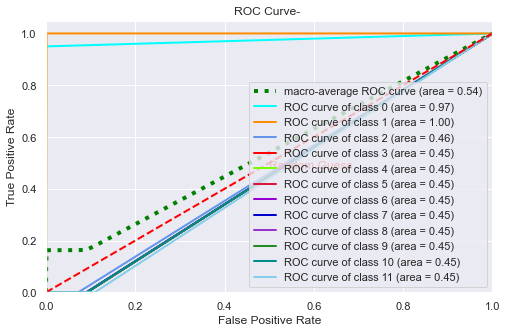

In [69]:
n_classes = y_test_vectorized.shape[1] 
pred1 = y_pred_rfemlp_vectorized.values #          model.predict(x_test)
y_test_ = y_test_vectorized.values

t1 = sum(x == 0 for x in pred1 - y_test_) / len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i])) #0

plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess', (.5, .48), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- ')
plt.legend(loc="lower right")
plt.show()
#y = pd.get_dummies(y, prefix='Label')
#*****************************

# K-Fold Cross Validation 

In [70]:
def evaluate_model(cv, X, y):
    global model
    # get the model
    #model = set_model_cv()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=2, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()

In [71]:
#mean_scores, min_scores, max_scores = evaluate_model(8, X, y)

In [72]:
#print(mean_scores, min_scores, max_scores)

In [73]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [74]:

ideal, _, _ = evaluate_model(LeaveOneOut(), X, y)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11) # fold = splits
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=False)#, random_state=0)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv, X, y)
	# report performance
	print('> folds=%d, balanced_accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)


Ideal: 0.943
> folds=2, balanced_accuracy=0.943 (0.940,0.945)
> folds=3, balanced_accuracy=0.944 (0.942,0.946)
> folds=4, balanced_accuracy=0.944 (0.944,0.945)
> folds=5, balanced_accuracy=0.944 (0.944,0.945)
> folds=6, balanced_accuracy=0.944 (0.944,0.944)
> folds=7, balanced_accuracy=0.944 (0.943,0.944)
> folds=8, balanced_accuracy=0.944 (0.943,0.945)
> folds=9, balanced_accuracy=0.944 (0.943,0.944)
> folds=10, balanced_accuracy=0.943 (0.942,0.944)


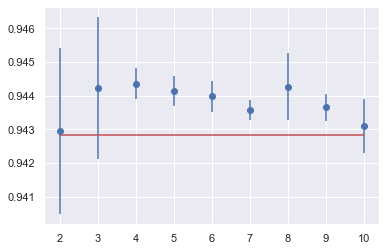

In [75]:

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

# When using oversampling train will tend to overfit
# Oversampling is only used in training data